# Neural network for classifying images into different classes

The Mnist fashion dataset has images of various outfits which belongs to 10 different classes - 'T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag','Ankle boot. Our goal is to create a deep learning model which will classify the input images into one of the 10 classes mentioned above. 

We will use Tensorflow, keras for implementing the deep learning model.

In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

We can see below that the input dataset is in the form of a 2x2 matrix split into train and test data. The train data has 60,000 values while the test data has 10,000 values.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Visualizing the input data with labels

In [17]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag','Ankle boot']

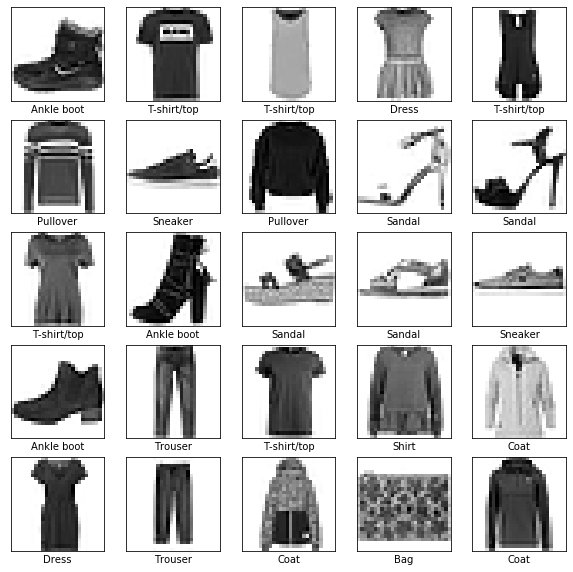

In [18]:
# Visualizing the first few images in the input dataset.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i]])

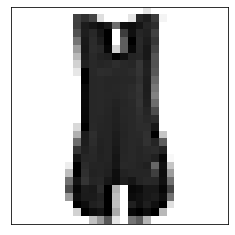

In [26]:
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[4], cmap=plt.cm.binary)

In [28]:
y_train[4]

0

# Flatten the data
The data in x_train and x_test are in 2x2 matrix. Below, we have written a code to convert it into 1 dimensional matrix. 

In [10]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
x_train_flat.shape

(60000, 784)

In [11]:
x_test_flat.shape

(10000, 784)

# Normalizing the data
We need to normalize the data before feeding it into the model. This will help in improving the accuracy of the model.

In [21]:
x_train = x_train/255
x_test = x_test/255

# Model creation

The model is created using keras. The network will have an input layer, hidden layer(s) and an output layer. We will use relu activation function in the hidden layer and softmax in the output layer. We can tweak the number of hidden layers and other parameters so as to improve the accuracy.

In [34]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 1.4115 - accuracy: 0.7591
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4953 - accuracy: 0.8244
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4422 - accuracy: 0.8416
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4141 - accuracy: 0.8514
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3975 - accuracy: 0.8576
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3760 - accuracy: 0.8644
Epoch 7/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3654 - accuracy: 0.8666
Epoch 8/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3448 - accuracy: 0.8738
Epoch 9/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3367 - accuracy: 0.8784
Epoch

# Using the model for prediction

The predicted output will give an array with the probability values for each output label. We will use argmax() function of numpy to determine label with the highest probability value which will be the output.

In [35]:
y_predicted = model.predict(x_test_flat)
y_predicted[0]

array([1.7428418e-08, 6.3010066e-12, 3.6083781e-15, 9.6433439e-07,
       7.3374679e-16, 5.7926442e-02, 2.0732788e-12, 2.8333372e-02,
       1.5513318e-05, 9.1372365e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[0])

9

In [42]:
y_test[0]

9

# Visualizing the predicted values Vs the actual values

We can visualize the predicted values vs actual values using a confusion matrix. The matrix below is visualized using heatmap function in seaborn data visualization library. It shows the number of values the model could predict accurately and the instances where the model went wrong.

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:3]

[9, 2, 1]

Text(69.0, 0.5, 'Actual')

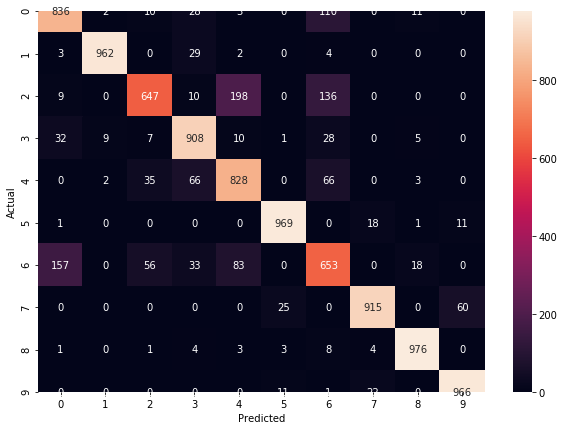

In [49]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

It can be seen above that the number of epochs used for training was 10 and the accuracy of the model after the training stood at 88%. The number of times the predicted value matched the actual value can be seen across the diagonal in the confusion matrix.